In [1]:
pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 276.5/276.5 MB 4.4 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 9.0 MB/s eta 0:00:00
     -------------------------------------- 126.5/126.5 kB 3.8 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.7 MB/s eta 0:00:00
     -------------------------------------- 430.5/430.5 kB 8.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 9.5 MB/s eta 0:00:00
     ---------------------------------------- 24.4/24.4 MB 7.6 MB/s eta 0:00:00
     ---------------------------------------- 57.5/57.5 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 9.3 MB/s eta 0:00:00
     -------------------------------------- 440.8/440.8 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 9.1 MB/s eta 0:00:00
     -------------------------------------- 181.8/

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
import tensorflow as tf

In [4]:
import os

In [5]:
import cv2

In [6]:
mnist = tf.keras.datasets.mnist

In [7]:
(Xtrain , ytrain) , (Xtest , ytest) = mnist.load_data()

In [8]:
Xtrain = tf.keras.utils.normalize(Xtrain , axis=1)

In [9]:
Xtest = tf.keras.utils.normalize(Xtest , axis = 1)

In [10]:
model = tf.keras.models.Sequential()

In [11]:
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))

In [12]:
model.add(tf.keras.layers.Dense(128 , activation='relu'))
model.add(tf.keras.layers.Dense(100 , activation='relu'))
model.add(tf.keras.layers.Dense(80 , activation = 'relu'))
model.add(tf.keras.layers.Dense(10 , activation='softmax'))

In [13]:
model.compile(optimizer='adam' , loss='sparse_categorical_crossentropy' , metrics=['accuracy'])

In [14]:
model.fit(Xtrain,ytrain , epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2656 - accuracy: 0.9210
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1114 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0784 - accuracy: 0.9757
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0588 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0462 - accuracy: 0.9848


In [15]:
model.save("handwritten.model")

INFO:tensorflow:Assets written to: handwritten.model\assets


INFO:tensorflow:Assets written to: handwritten.model\assets


In [16]:
loss , accuracy = model.evaluate(Xtest , ytest)

313/313 [==============================] - 1s 1ms/step - loss: 0.1042 - accuracy: 0.9714


In [17]:
loss

0.1041954830288887

In [18]:
accuracy

0.9714000225067139

1/1 [==============================] - 0s 120ms/step
According to my observation the digit is 3


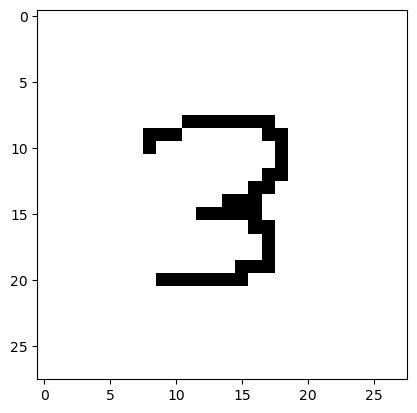

1/1 [==============================] - 0s 24ms/step
According to my observation the digit is 4


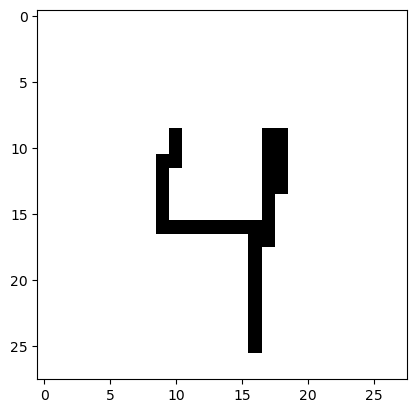

1/1 [==============================] - 0s 22ms/step
According to my observation the digit is 2


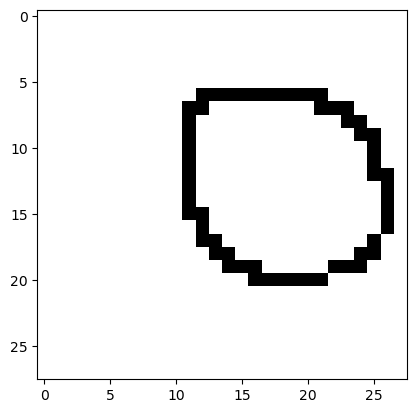

1/1 [==============================] - 0s 30ms/step
According to my observation the digit is 7


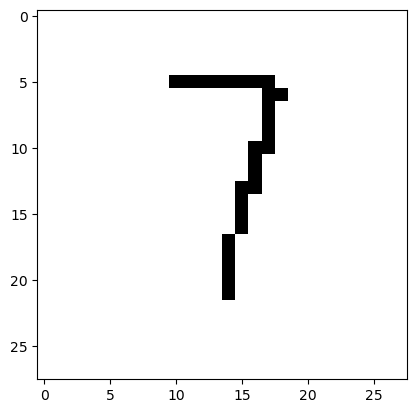

1/1 [==============================] - 0s 30ms/step
According to my observation the digit is 8


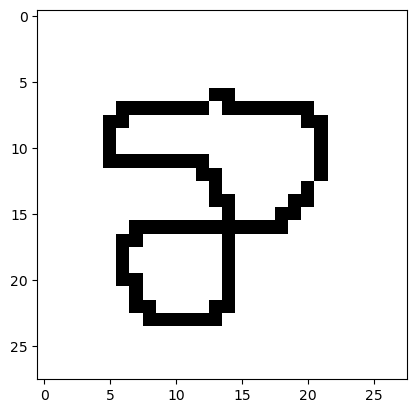

1/1 [==============================] - 0s 24ms/step
According to my observation the digit is 9


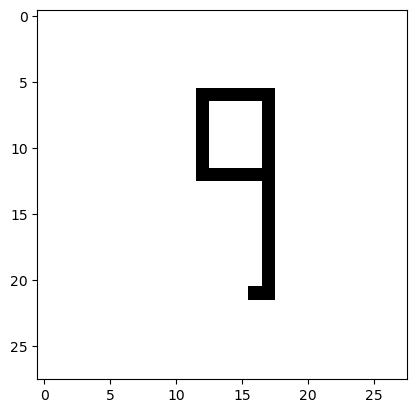

1/1 [==============================] - 0s 27ms/step
According to my observation the digit is 5


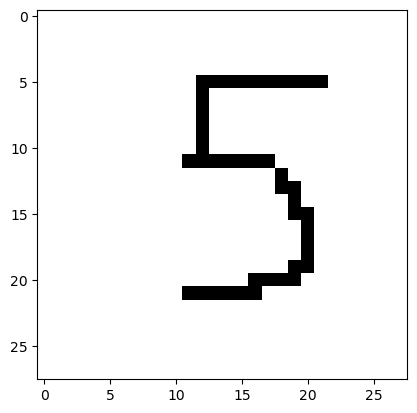

1/1 [==============================] - 0s 27ms/step
According to my observation the digit is 1


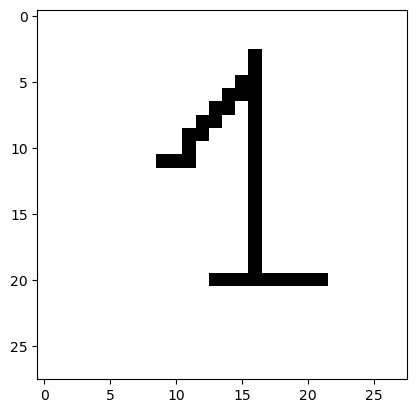

1/1 [==============================] - 0s 36ms/step
According to my observation the digit is 2


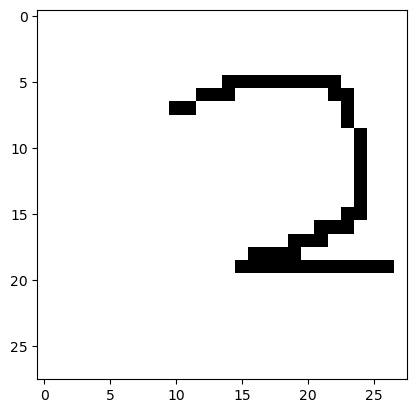

1/1 [==============================] - 0s 28ms/step
According to my observation the digit is 6


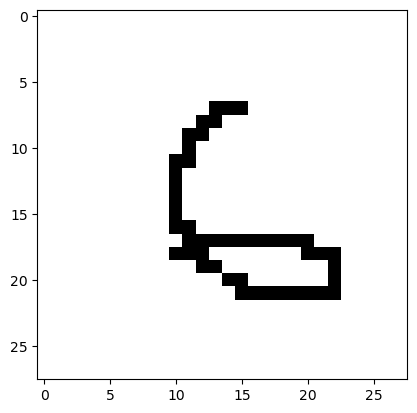

1/1 [==============================] - 0s 24ms/step
According to my observation the digit is 4


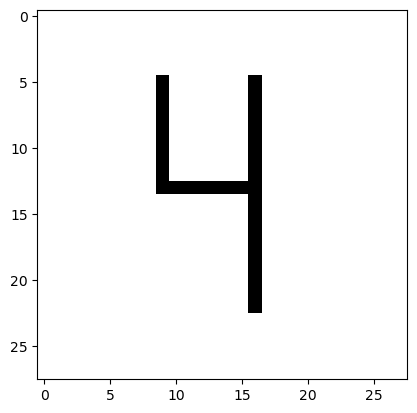

In [19]:
image_number = 1

while os.path.isfile(f"digit{image_number}.png"):
    img = cv2.imread(f"digit{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"According to my observation the digit is {np.argmax(prediction)}")
    plt.imshow(img[0] , cmap=plt.cm.binary)
    plt.show()
    image_number = image_number + 1
